# Plotting decision boundaries of classifiers

This example will show how to plot the decision boundaries of classifiers. The classifiers we are considering are for simple toy problems using just two features. (The reason for using two-dimensional numerical data is that we want to show the examples visually.)

We import NumPy for generating random numbers, the plotting library, and two classifiers from scikit-learn.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# plotting cosmetics
%config InlineBackend.figure_format = 'svg' 
plt.style.use('bmh')

# example of a linear model
from sklearn.linear_model import Perceptron

# example of a tree model
from sklearn.tree import DecisionTreeClassifier

Let's make some synthetic data.

To make the features for the `n` instances, we first generate random normally distributed numbers stored in a matrix with `n` rows (one for each instance) and 2 columns (one for each feature).

We also generate, uniformly, an output label for each instance. This is a binary classification problem and the allowed outputs are `+1` or `-1`. Then, to make these instances possible to separate, we shift the two groups a little bit away from each other: for `-1` instances, a little bit to the left and up, and for `+1` instances a bit in the opposite direction.

We finally plot the dataset using a scatterplot. `-1` instances are blue, `+1` instances red.

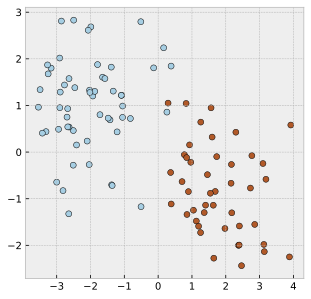

In [2]:
np.random.seed(0)

def make_data(n):
    Y = np.random.choice([-1, +1], size=n)
    X = np.random.normal(size = (n, 2))
    for i in range(len(Y)):
        X[i] += Y[i]*np.array([-2, 0.9])
    return X, Y

X, Y = make_data(100)

plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=Y, cmap='Paired_r', edgecolors='k');

We'd now like to make classifiers that can decide for a given instance whether it is `-1` (blue) or `+1` (red). We train two classifiers using the synthetic dataset we create above. Both of the classifiers are imported from scikit-learn.

One of the classifiers is a Perceptron, which is a type of linear classifier. The other is a decision tree classifier.

In [3]:
perc = Perceptron(max_iter=5)
perc.fit(X, Y)

tree = DecisionTreeClassifier()
tree.fit(X, Y);

To exemplify, let's see what the two classifiers predict for the point (3, 2), which did not occur in the training set. As you can see, they have different opinions.

In [10]:
perc.predict([[3, 2]]), tree.predict([[3, 2]])

(array([-1]), array([1]))

To investigate the properties of the classifiers a bit more thoroughly, we will consider the decision boundaries.

We make a helper function that can plot the dataset and the decision boundary of a classifier. To find the boundary between the classes, as defined by a classifier, the algorithm will classify a large set of points, and find the points where the classifier's decision changes.

This code was adapted from [an example](https://scikit-learn.org/stable/auto_examples/svm/plot_iris.html) in scikit-learn's documentation.

In [4]:
def plot_decision_boundary(clf, X, Y, cmap='Paired_r'):
    h = 0.02
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=cmap, edgecolors='k');

We plot the decision boundary for the perceptron classifier. As expected because the perceptron is a linear classifier, this turns out to be a straight line between the red and the blue area.

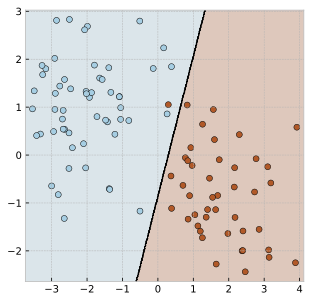

In [6]:
plot_decision_boundary(perc, X, Y)

For the decision tree classifier, we get a "rectangular" pattern. The reason is that a decision tree classifier considers one feature at a time.

This decision tree seems to be something like

```
if x1 <= 0.2:
    return -1      [that is, 'Blue']
else:
    if x2 <= 1.4:
        return 1   ['Red']
    else:
        return -1  ['Blue']
```

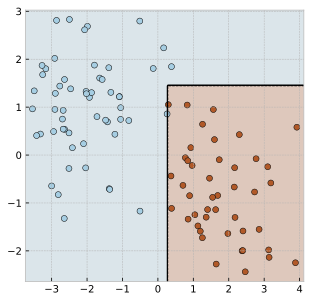

In [7]:
plot_decision_boundary(tree, X, Y)